# PCA compression of atmospheres and spectra 

We are going to use PCA to reduce the dimensionallity of our atmospheres (T and v columns) and spectra.

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
from astropy.io import fits
from sklearn.decomposition import PCA, IncrementalPCA

In [4]:
original = fits.open("C:/Data/50G.ngrey.288x100x288_atmos_61.fits")[0].data
#cnn_compressed = fits.open("C:/Data/50G.ngrey.288x100x288_atmos_50_compressed.fits")[0].data # we will do this later

In [5]:
original.shape

(12, 288, 288, 61)

In [7]:
temp = original[2,:,:,:].reshape(288*288,61)
temp.shape

(82944, 61)

In [89]:
n_components = 61
ipca = IncrementalPCA(n_components=n_components, batch_size=100)
temp_transformed = ipca.fit_transform(temp)

#pca = PCA(n_components=n_components)
#X_pca = pca.fit_transform(X)

In [90]:
temp_transformed.shape

(82944, 61)

In [91]:
temp_compressed = ipca.inverse_transform(temp_transformed)
temp_compressed.shape

(82944, 61)

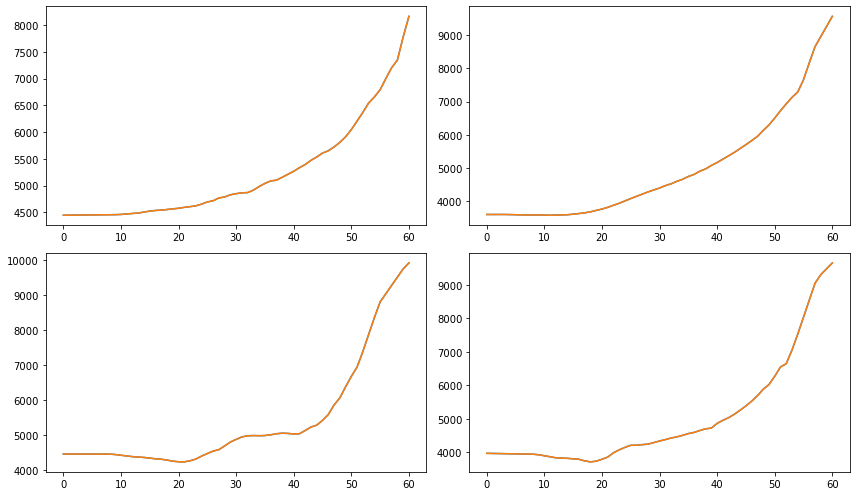

In [92]:
plt.figure(figsize=[12,7])
plt.subplot(221)
index = np.random.randint(0,82843)
plt.plot(temp[index])
plt.plot(temp_compressed[index])
plt.subplot(222)
index = np.random.randint(0,82843)
plt.plot(temp[index])
plt.plot(temp_compressed[index])
plt.subplot(223)
index = np.random.randint(0,82843)
plt.plot(temp[index])
plt.plot(temp_compressed[index])
plt.subplot(224)
index = np.random.randint(0,82843)
plt.plot(temp[index])
plt.plot(temp_compressed[index])
plt.tight_layout()

#### Let's look at the basis vectors now

In [93]:
vectors = np.squeeze(ipca.components_)


In [94]:
vectors.shape


(61, 61)

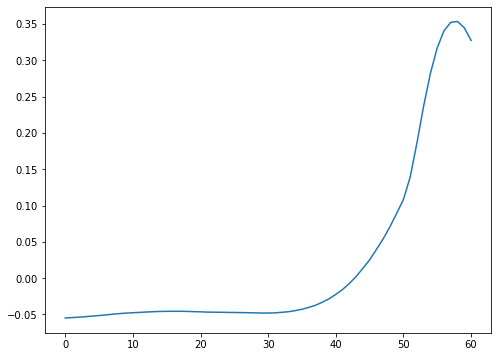

In [95]:
plt.figure(figsize=[8,6])
plt.plot(vectors[0])

In [96]:
print (np.sum(vectors[0]*vectors[6]))

-1.3877787807814457e-17


#### Let's look at the original and compressed temperature distributions

In [97]:
temp_compressed_cube = temp_compressed.reshape(288,288,61)

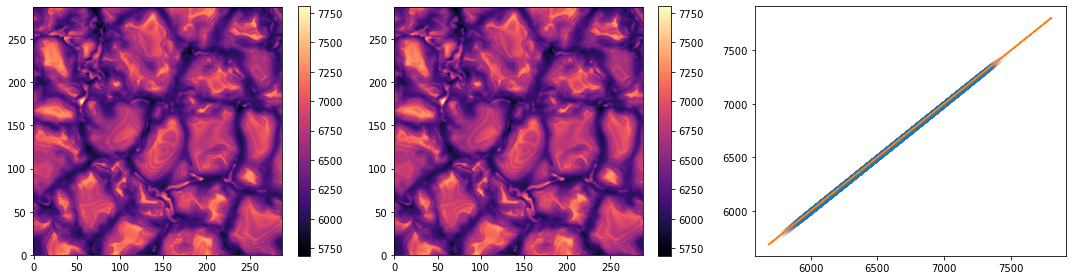

In [100]:
d = 50
plt.figure(figsize=[15,4])
plt.subplot(131)
plt.imshow(original[2,:,:,d].T,cmap='magma',origin='lower')
plt.colorbar()
plt.subplot(132)
plt.imshow(temp_compressed_cube[:,:,d].T,cmap='magma',origin='lower')
plt.colorbar()
plt.subplot(133)
plt.plot(original[2,:,:,d].flatten(),temp_compressed[:,d],'o',alpha=0.002)
plt.plot(original[2,:,:,d].flatten(),original[2,:,:,d].flatten())
plt.tight_layout()